In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

C:\Users\ForPeople\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']

In [4]:
log_returns = np.log(1 + data.pct_change())
log_returns.head()

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002517


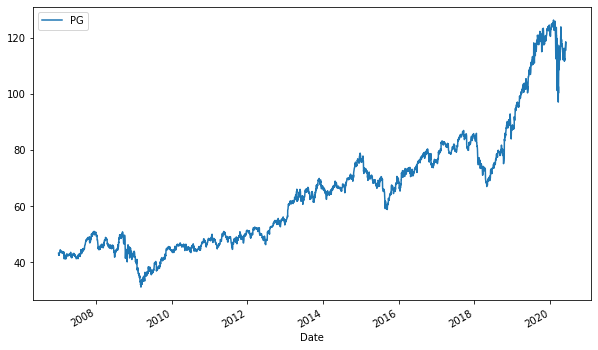

In [5]:
data.plot(figsize=(10,6))

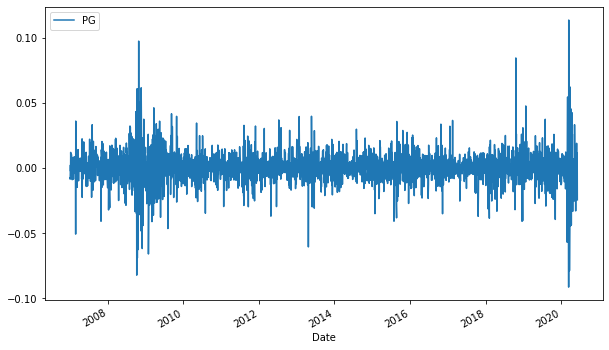

In [6]:
log_returns.plot(figsize =(10,6))

In [8]:
u = log_returns.mean()
u

PG    0.000292
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000143
dtype: float64

In [10]:
drift = u - (0.5 * var)
drift

PG    0.00022
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

PG    0.011968
dtype: float64

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00022028])

In [15]:
drift.values

array([0.00022028])

In [16]:
stdev.values

array([0.01196799])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10,2)
x

array([[0.69611407, 0.6349422 ],
       [0.08046894, 0.73818604],
       [0.50164815, 0.81384688],
       [0.44242671, 0.1809101 ],
       [0.66839423, 0.99515749],
       [0.21616703, 0.21316918],
       [0.18390033, 0.95605988],
       [0.22673142, 0.76863672],
       [0.16377593, 0.27170292],
       [0.93574672, 0.23620234]])

In [19]:
norm.ppf(x)

array([[ 0.51325657,  0.34497177],
       [-1.40192421,  0.63776309],
       [ 0.00413131,  0.89216175],
       [-0.14481946, -0.91190222],
       [ 0.43548346,  2.58687682],
       [-0.78520385, -0.79547309],
       [-0.90060071,  1.706687  ],
       [-0.74965447,  0.73436461],
       [-0.97905692, -0.60767078],
       [ 1.52001755, -0.71857198]])

In [22]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.74909507,  0.93502046],
       [-0.6966466 , -1.4644052 ],
       [-0.5349057 , -0.74800419],
       [ 0.22718072,  0.82559958],
       [-0.12628087,  0.08231159],
       [-0.11637558, -0.3251199 ],
       [ 0.87662952,  0.01029265],
       [ 1.52321666,  1.93078489],
       [ 1.12760542, -0.37289992],
       [ 0.46001965,  0.57534515]])

In [23]:
t_intervals = 1000
iterations = 10

In [24]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))

In [25]:
daily_returns

array([[1.01311315, 1.00812181, 0.97712071, ..., 0.98987148, 0.97953602,
        1.00281688],
       [1.01162111, 1.00921985, 1.01348034, ..., 0.99262823, 1.00220612,
        0.98534996],
       [0.99160818, 1.00364684, 1.01541866, ..., 0.99637697, 1.00414378,
        0.99755939],
       ...,
       [1.02073703, 0.9981006 , 1.00177816, ..., 1.0248824 , 0.99411946,
        0.99224451],
       [0.99274723, 0.9985188 , 0.99127425, ..., 0.98987277, 1.00629116,
        0.97801257],
       [1.00022736, 1.00282793, 1.00654088, ..., 1.00072758, 0.99526133,
        1.00916979]])

In [26]:
s0 = data.iloc[-1]
s0

PG    115.6595
Name: 2020-06-04 00:00:00, dtype: float64

In [27]:
price_list = np.zeros_like(daily_returns)

In [28]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
price_list[0] = s0
price_list

array([[115.65950012, 115.65950012, 115.65950012, ..., 115.65950012,
        115.65950012, 115.65950012],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [30]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t -1] * daily_returns[t]

In [31]:
price_list

array([[115.65950012, 115.65950012, 115.65950012, ..., 115.65950012,
        115.65950012, 115.65950012],
       [117.00359207, 116.72586311, 117.21862909, ..., 114.80688534,
        115.91465841, 113.96508378],
       [116.02171953, 117.15154391, 119.02598355, ..., 114.39093649,
        116.39498313, 113.68693933],
       ...,
       [147.09137636, 169.49398609,  98.65693226, ..., 115.36856379,
         85.76015961, 155.19623876],
       [146.02455677, 169.24293103,  97.79607662, ..., 114.20020023,
         86.29969061, 151.78387232],
       [146.05775698, 169.7215387 ,  98.43574899, ..., 114.28328965,
         85.89074482, 153.17569787]])

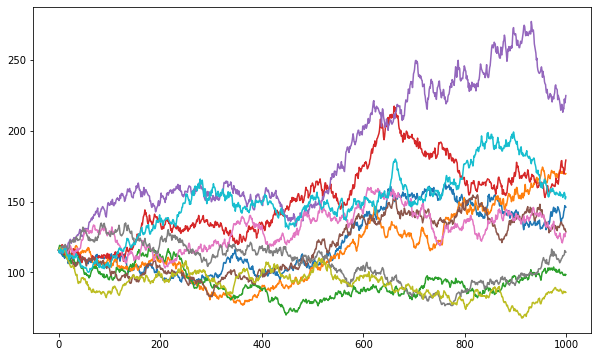

In [32]:
plt.figure(figsize=(10,6))
plt.plot(price_list)

In [ ]:
.